# Kunskapskontroll 1 statistik och dataanalys
## Del 1 – Teoretiska frågor

1. <u>Många barn tror att de blev till genom att en stork 
    kom och lämnade dem till deras föräldrar.  
    
    För att undersöka det kan vi kolla på data och det 
    finns en graf enligt figuren nedan.  
    
    Det verkar alltså finnas ett samband mellan antalet 
    storkar och barnafödsel!? Stämmer detta påståendet? Använd begreppen ”korrelation” 
    och ”kausalitet” i ditt svar.</u>

    Svar: Korrelation innebär att det finns ett samband mellan variabler och kausalitet innebär att en variabel påverkar en annan. I detta fallet så ser vi att det finns ett samband mellan antal storkpar och barnfödsel dvs en korrelation. Dock så stämmer inte påståendet då det inte finns någon kausalitet. Det kan vara ett rent sammanträffande att det blivit så eller så finns den någon annan underliggande faktor som vi inte vet just nu. 

2. <u>Din kollega som inte studerat statistik frågar dig: vad är korrelation? Förklara det för din 
    kollega med hjälp av bilden nedan.</u>

    Svar: Korrelation visar hur starkt ett samband är mellan olika variabler. Övre bilderna visualiserar ett spann från starkt postivt samband till inget samband alls till starkt negativt samband. Mellersta bilderna visualiserar liknande spann men förstärker det linjära sambandet. Nedersta bilderna visualiserar korrelation som inte har något linjärt samband men det betyder dock inte att det saknas samband. I detta fallet finns samband i och med att de olika observationerna ligger så pass nära varandra.

3. <u>Kim påstår att ”medelvärdet” är ett bättre mått än ”medianvärdet”. Håller du med Kim?</u>

    Svar: Medelvärdet är ett användbart mått i många olika sitautioner men just i detta fallet är medianvärdet betydligt mer användbart. Detta för att risken med att använda medelvärde på en mängd olika uppmätta värden kan vara missvisande om spridningen på värdena är hög. På grund av detta är median, allstå värdet som är i mitten av alla uppmätta värden bättre riktlinje för att återspegla korrekt värde för alla observerade värden.

4. <u>Vad används cirkeldiagram för? Ge ett exempel på vad ett företag som Spotify (eller 
något annat företag som du själv väljer) hade kunnat använda cirkeldiagram för.</u>

    Svar: Cirkeldiagram används för att visualisera hur stor andel av något. Ex. Kan Spotify använda ett cirkeldiagram för att visualisera vilken genre som det lyssnas mest på.

5. <u>Vad används linjediagram för? Ge ett exempel på vad ett företag som Spotify (eller något 
annat företag som du själv väljer) hade kunnat använda linjediagram för.</u>

    Svar: Linjediagram används till att visualisera hur något kan förändras över tid. Ex. Kan Spotify använda det till för att se hur antal användare ändras över tid.

6. <u>Vad används lådagram för?</u>

    Svar: Lådagram (Boxplot) används för att sortera in observerade värden i en rektangel där medianen är det mittersta värdet. Nedre kvartilen ligger på 25% och övre kvartilen 75%. Detta kan man då använda för att se fördelningen på observerade värden. Detta används mycket inom statistik där man vill kartlägga hur stor spridning man har på sina observerade värden.

7. <u>Antag att vikten för nyfödda barn är normalfördelad. I sverige är medelvikten för nyfödda 
    barn 3.5 kg och standardavvikelsen 0.5 kg. Vad betyder detta rent konkret? Vad är 
    exempelvis sannolikheten att ett barn väger över 4.5 kg eller mindre än 3 kg? 
    
    Om vi kollar på 1000 nyfödda barn, hur många barn förväntar vi oss väger över 4.5 kg?</u>

    Svar: Det betyder konkret att nyfödda barns vikt kommer ligga runt medelvikten som i detta fall är 3,5 kg med en standardavvikelse på 0,5 kg. Nyföddas vikt förväntas vara inom spannet på 3 - 4 kg med 64,26% sannolikhet.

    Sannolikheten för att ett barn <u>väger över 4,5 kg är 2,27%</u> 

    Sannolikheten för att ett barn <u>väger mindre än 3 kg är 15,86 %</u>

    Vi förväntar oss att av 1000 nyfödda barn <u>väger 23 st över 4,5 kg.</u>

## Del 2 – Statistisk dataanalys i Python

### Data storytelling

I denna notebook kommer vi analysera datsetet HR_Employee_Data för att se vad den dels innehåller men även vilka slutsatser vi kan dra utifrån den. Vi kommer börja med att titta vad datasetet innehåller, dels vilka kolumner men även olika datatyper för att se om vi behöver tvätta data innan vi analyserar den. När vi väl tvättat det vi anser att vi behöver går vi vidare med vår analys. Vi skapar en heatmap för att se om det finns några uppenbara korrelationer mellan våra kolumner. Vi får en indikation på att satisfaction level korrelerar svagt negativt med left the company. Vi undersöker vidare med att kolla hur satisfaction level ser ut för varje enskild department. Ligger ganska jämnt och fint men finns en department som ligger lite lägre än de andra. Det är intressant och det ska vi kolla närmare på.

Vi jämför senare alla departments satisfaction level med föregående evaluation för att se om samma mönster syns där. Det gör det inte. Last evaluation ligger alla departments i linje med varandra. Alltså har något hänt sen dess. Vi bestämmer oss för att jämföra den department (accounting) som har lägst satisfaction level med en som har bland de högsta (Marketing). Vi tittar på satisfaction mot antal år de anställda på vardera department och ser att ddet inte skiljer sig något vidare där heller. 

Härnäst bestämmer vi oss för att titta närmare på hur fördelning för lönenivåerna ser ut på de respektive departments. Återigen inga större skillnader utan följa varandras mönster. Enda direkta skillnader verkar vara antalet anställda på respektive department. Marginel sett till helheten. 

Nu vänder vi oss vidare till att se hur satisfaction level är baserat på andelen lönenivå för respektive department. Något sämre satisfaction för accounting jämfört med marketing för lönenivåerna low & medium. Vi bestämmer oss för att titta ytterliggare på fördelning av satisfaction level baserat på antalet anställda för vardera department. Där ser man att accounting är överrepresenterade vid den lägre satisfaction level. 

Det sista vi tittar på är andelen anställda som har lämnat  respektive department och hur fördelningen ser ut för deras satisfaction level.

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_excel(r'C:\Users\john_\Documents\Tuc_ds\Kurser\Statistik_&_Dataanalys\Kunskapskontroll_1\HR_Employee_Data.xlsx')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [8]:
if 'average_montly_hours' in df.columns:
    df.rename(columns={"average_montly_hours": "average_monthly_hours"}, inplace=True)
if "Department" in df.columns:
    df.rename(columns={"Department": "department"}, inplace=True)
if 'Work_accident' in df.columns:
    df.rename(columns={"Work_accident": "work_accident"}, inplace=True)
if "Emp_Id" in df.columns:
    df.rename(columns={"Emp_Id": "emp_id"}, inplace=True)
if "promotion_last_5years" in df.columns:
    df.rename(columns={"promotion_last_5years": "promotion_last_5_years"}, inplace=True)
if "left" in df.columns:
    df.rename(columns={"left": "left_the_company"}, inplace=True)

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_the_company,promotion_last_5_years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.head()

,emp_id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_the_company,promotion_last_5_years,department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.select_dtypes(include=["int", "float"]).corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_the_company,promotion_last_5_years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left_the_company,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

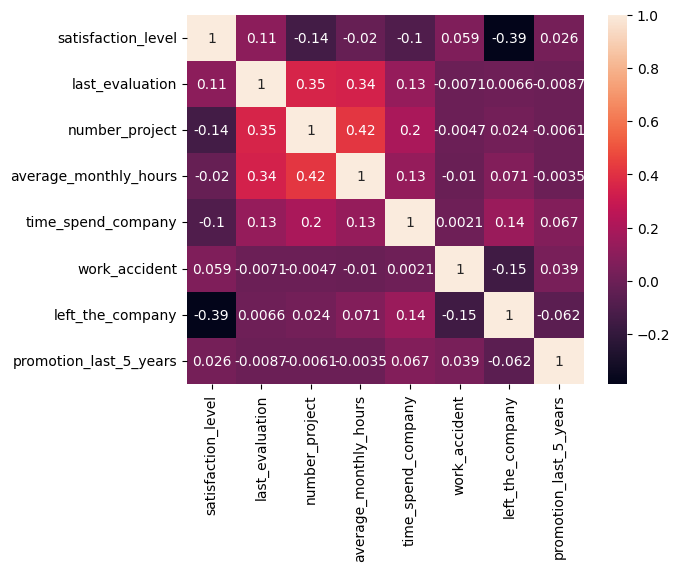

In [12]:
sns.heatmap(df.select_dtypes(include=["int", "float"]).corr(), annot=True)

Text(0.5, 1.0, 'Mean Satisfaction Level by Department')

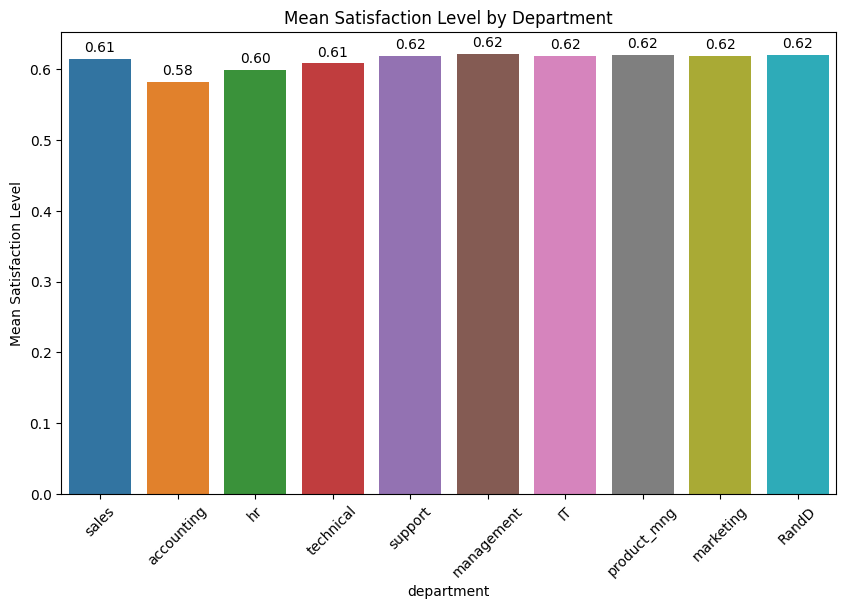

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x="department", y="satisfaction_level", estimator=np.mean, hue="department", errorbar=None)

for bar in ax.containers:
    ax.bar_label(bar, fmt="%.2f", label_type="edge", padding=3)

plt.xticks(rotation=45) 
plt.ylabel("Mean Satisfaction Level")
plt.title("Mean Satisfaction Level by Department")

In [14]:
last_satisfaction_department_df = df.groupby("department")[["satisfaction_level", "last_evaluation"]].mean().round(2).reset_index()

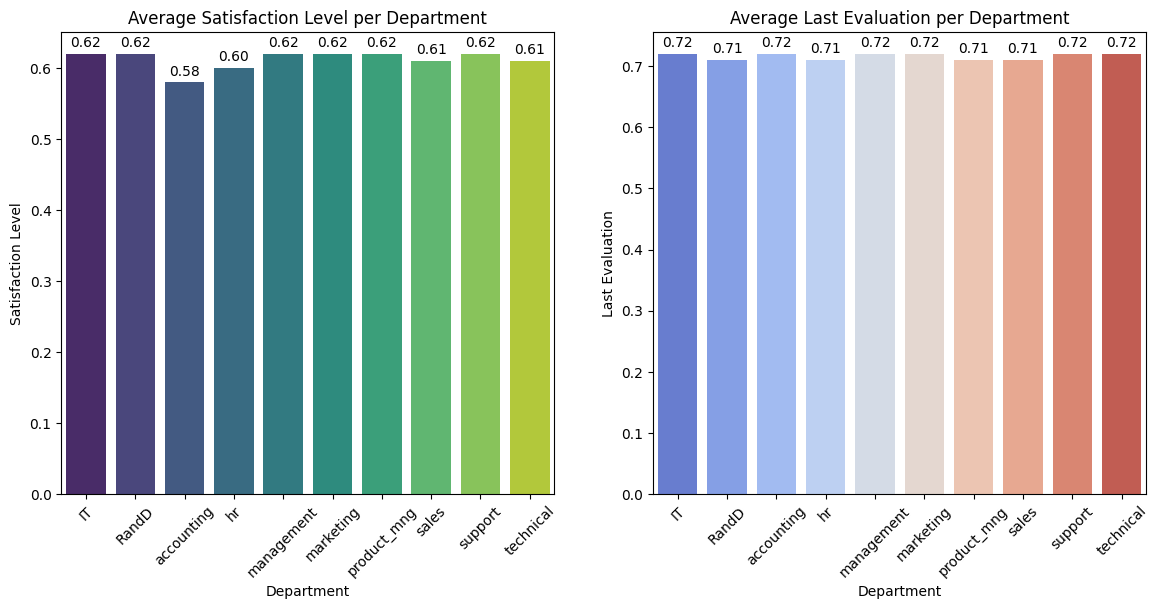

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
 
ax = sns.barplot(ax=axes[0], data=last_satisfaction_department_df, x="department", y="satisfaction_level", palette="viridis", hue="department")
axes[0].set_title("Average Satisfaction Level per Department")
axes[0].set_xlabel("Department")
axes[0].set_ylabel("Satisfaction Level")
 
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type="edge", padding=3)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
 
ax = sns.barplot(ax=axes[1], data=last_satisfaction_department_df, x="department", y="last_evaluation", palette="coolwarm", hue="department")
axes[1].set_title("Average Last Evaluation per Department")
axes[1].set_xlabel("Department")
axes[1].set_ylabel("Last Evaluation")
 
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type="edge", padding=3)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Text(0, 0.5, 'Satisfaction Level')

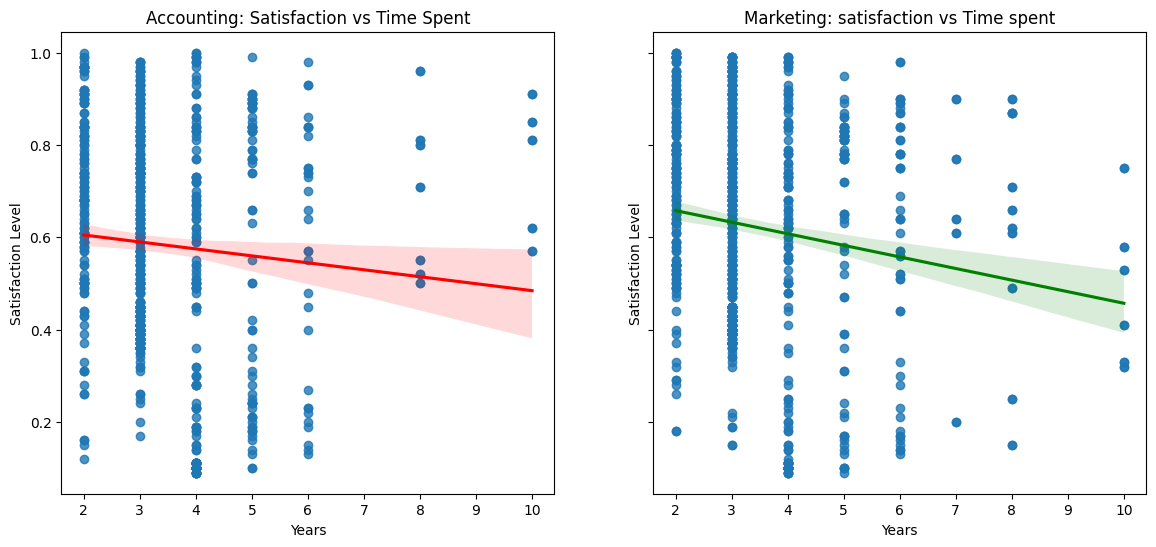

In [16]:

accounting = df[df["department"].isin(["accounting"])]
marketing = df[df["department"].isin(["marketing"])]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.regplot(data=accounting, x="time_spend_company", y="satisfaction_level",scatter=True, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title("Accounting: Satisfaction vs Time Spent")
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Satisfaction Level")


sns.regplot(data=marketing, x="time_spend_company", y="satisfaction_level",scatter=True, line_kws={"color": "green"}, ax=axes[1])
axes[1].set_title("Marketing: satisfaction vs Time spent")
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Satisfaction Level")


Text(0, 0.5, 'Employees')

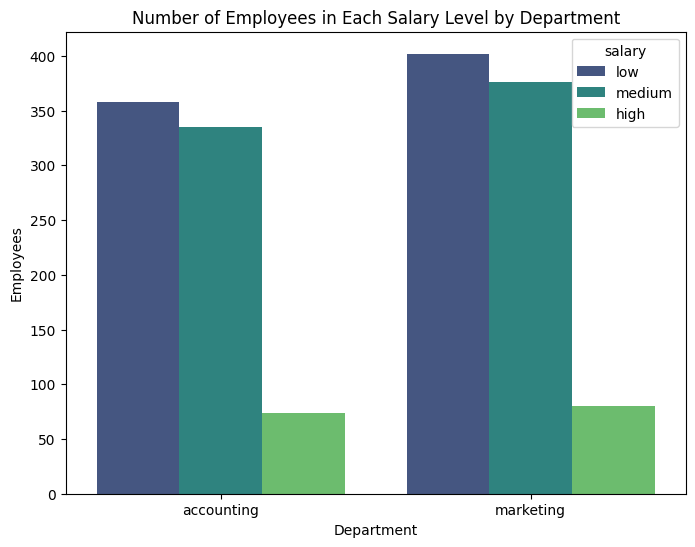

In [18]:
accounting_marketing = df[df["department"].isin(["accounting", "marketing"])]

plt.figure(figsize=(8,6))

sns.countplot(data=accounting_marketing, x="department", hue="salary", palette="viridis")


plt.title("Number of Employees in Each Salary Level by Department")
plt.xlabel("Department")
plt.ylabel("Employees")

In [19]:
df_department = accounting_marketing.groupby(["department", "salary"]).agg(
    avg_satisfaction=("satisfaction_level", "mean"),
    count=("salary", "count")
).reset_index()

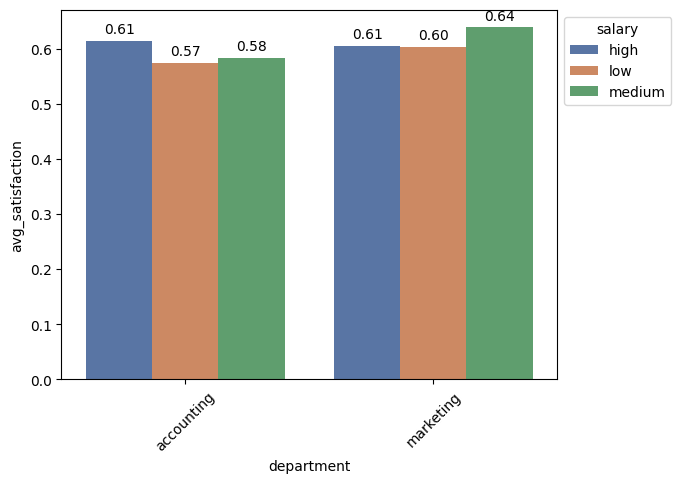

In [20]:

ax = sns.barplot(data=df_department, x="department", y="avg_satisfaction", hue="salary", palette="deep")
plt.xticks(rotation=45)
plt.legend(title="salary", bbox_to_anchor=(1, 1))
 
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type="edge", padding=3)

Text(0.5, 1.0, 'Distribution of employees satisfaction level')

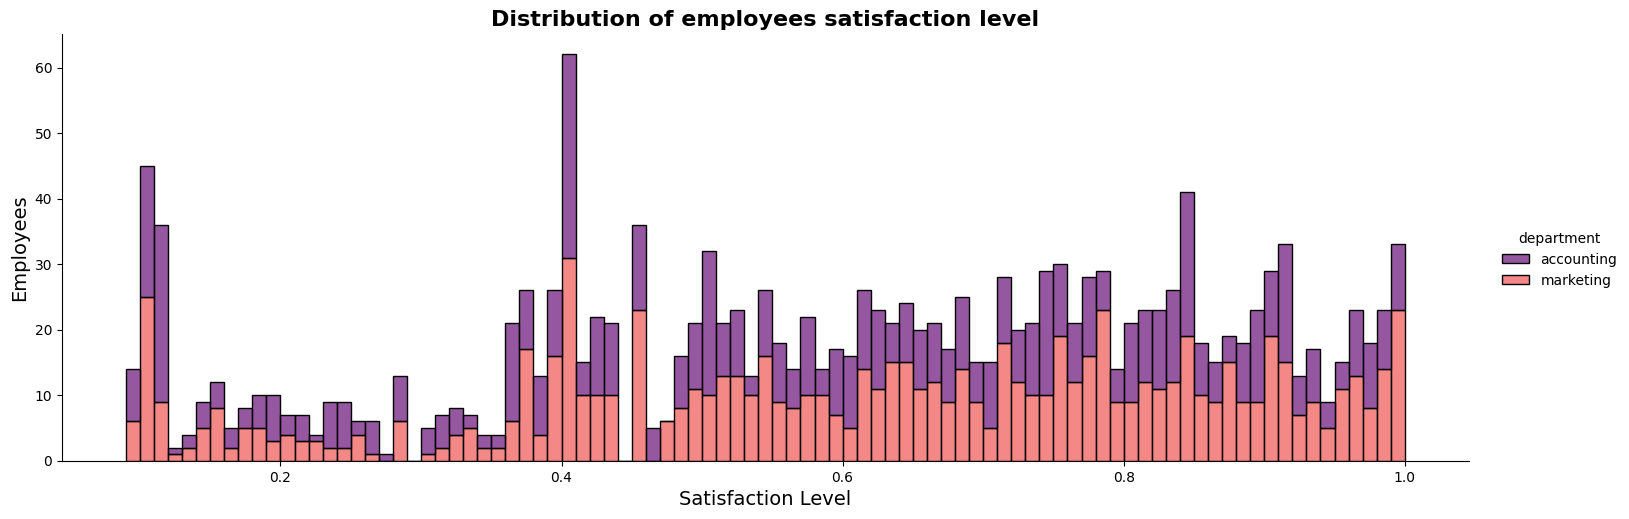

In [21]:
sns.displot(accounting_marketing, x="satisfaction_level", hue="department", binwidth=.01, aspect=3, multiple="stack", palette="magma")

plt.xlabel("Satisfaction Level", fontsize=14)
plt.ylabel("Employees", fontsize=14)
plt.title("Distribution of employees satisfaction level", fontsize=16, fontweight="bold")


Text(0, 0.5, 'Satisfaction Level')

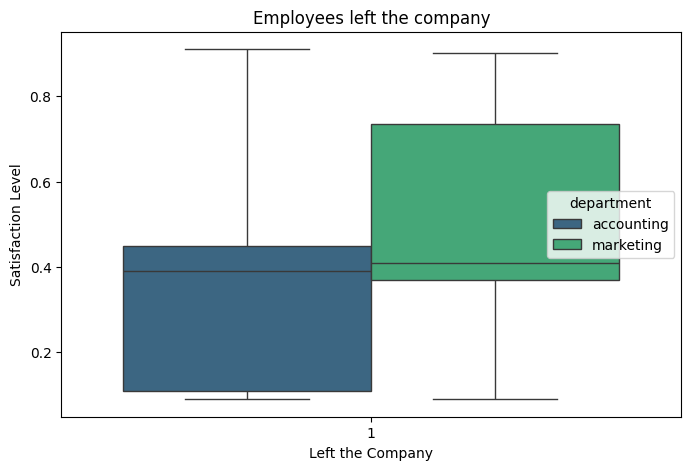

In [22]:
plt.figure(figsize=(8,5))


filtered2_data = accounting_marketing[accounting_marketing["left_the_company"].isin([1])]

sns.boxplot(data=filtered2_data, x="left_the_company", y="satisfaction_level", hue="department", palette="viridis")

plt.title("Employees left the company")
plt.xlabel("Left the Company")
plt.ylabel("Satisfaction Level")

### Executive summary

Vad har jag då kommit fram till efter denna analys? jo, vi har tittat på lönenivåer, arbetstimmar, år på företaget osv men där skiljer det sig inte tillräkligt mycket för att man ska kunna tolka det som en eventuellt orsak till lägre satisfaction nivå. Det verkar som att satisfaction nivån på accounting är lägre hos de som valt att lämna företaget än på exempelvis marketing. Vad det kan bero på, det vet vi inte i nuläget och det får vi jobba vidare med för att ta reda på. Min rekommendation är att fortsätta analysera och regelbundet utvärdera för att ta reda på vad det är som gör att de som väljer att söka sig vidare är mer missnöjda med sin arbetsplats.

## Del 3 Självutvärdering 

1. Vad har varit roligast i kunskapskontrollen?

    Det som varit utan tvekan det roligaste med denna kunskapskontrollen är att försöka sätta sig in i datan som vi har att tilgå och försöka dra några slutsatser från den. Den undersökande aspekten på det hela är något som verkligen tilltalar mig. 

2. Vilket betyg anser du att du ska ha och varför?

    Jag strävar som alltid efter betyget VG. Vilket betyg jag anser borde vara lämpligt i detta fallet är jag delvis kluven om på grund av att jag anser att jag uppfyllt kriterierna för det högre betyget men jag är inte helt nöjd med mitt resultat. 

3. Vad har varit mest utmanande i arbetet och hur har du hanterat det?

    Det som varit utmanande är att försöka lista ut vilket fokus / infallsvinkel på uppgiften man bör ha. Jag har reflekterat en hel del kring detta. Tankegångarna har gått fram och tillbaka i hänsyn till balansgången mellan att förutbestämma vad man ska titta på kontra titta på allt utan infallsvinkel. Jag har kommit fram till att det finns olika tillväga gångssätt när man ska utföra en analys. Det kan finnas förutbestämda parametrar som man får i uppdrag att undersöka. exempelvis en specifik avdelning på ett företag. Det kan också vara så att man gör en analys på data utan någon direkt infallsvinkel utan mer är riktad mot helheten för att se vad man kan dra för slutsatser. Det har så klart även varit utmanande med python koden i sig också i vanlig ordning. Hur har jag då hanterat detta? Jo, jag bestämde mig för att bygga upp scenariot att jag har en specifik infallsvinkel och därigenom analysera det som är relevant för just det scenariot.